In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!which python
!python --version

/Users/amarmesic/miniconda3/envs/cda/bin/python
Python 3.12.2


In [5]:
# Load the .binetflow file into a DataFrame
file_path = 'cda-lab3-botnet-detection/dataset_11/capture20110818-2.binetflow'

columns = ['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr', 'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes', 'Label']

df = pd.read_csv(file_path, names=columns, header=0)

### Preprocess data

In [8]:
# Convert StartTime to datetime
df['StartTime'] = pd.to_datetime(df['StartTime'], format='%Y/%m/%d %H:%M:%S.%f')

# Convert numeric columns to appropriate data types
df['Dur'] = pd.to_numeric(df['Dur'], errors='coerce')
df['TotPkts'] = pd.to_numeric(df['TotPkts'], errors='coerce')
df['TotBytes'] = pd.to_numeric(df['TotBytes'], errors='coerce')
df['SrcBytes'] = pd.to_numeric(df['SrcBytes'], errors='coerce')

# Display basic information about the DataFrame
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107251 entries, 0 to 107250
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   StartTime  107251 non-null  datetime64[ns]
 1   Dur        107251 non-null  float64       
 2   Proto      107251 non-null  object        
 3   SrcAddr    107251 non-null  object        
 4   Sport      106788 non-null  object        
 5   Dir        107251 non-null  object        
 6   DstAddr    107251 non-null  object        
 7   Dport      99351 non-null   object        
 8   State      107160 non-null  object        
 9   sTos       106271 non-null  float64       
 10  dTos       90292 non-null   float64       
 11  TotPkts    107251 non-null  int64         
 12  TotBytes   107251 non-null  int64         
 13  SrcBytes   107251 non-null  int64         
 14  Label      107251 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011-08-18 15:40:53.826372,2.983247,tcp,76.76.172.248,63577,->,147.32.84.229,13363,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
1,2011-08-18 15:40:55.435494,2.906029,tcp,76.76.172.248,63580,->,147.32.84.229,443,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
2,2011-08-18 15:40:57.060613,3.030517,tcp,76.76.172.248,63582,->,147.32.84.229,80,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
3,2011-08-18 15:40:56.809619,6.016227,tcp,76.76.172.248,63577,->,147.32.84.229,13363,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established
4,2011-08-18 15:40:58.341523,6.124715,tcp,76.76.172.248,63580,->,147.32.84.229,443,SR_SA,0.0,0.0,3,184,122,flow=Background-TCP-Established


## Visualizations

/var/folders/gn/8cmn0qdj1mx7g0mxnt5q722h0000gp/T/ipykernel_21935/3632365980.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  flows_per_minute = df.resample('T', on='StartTime').size()


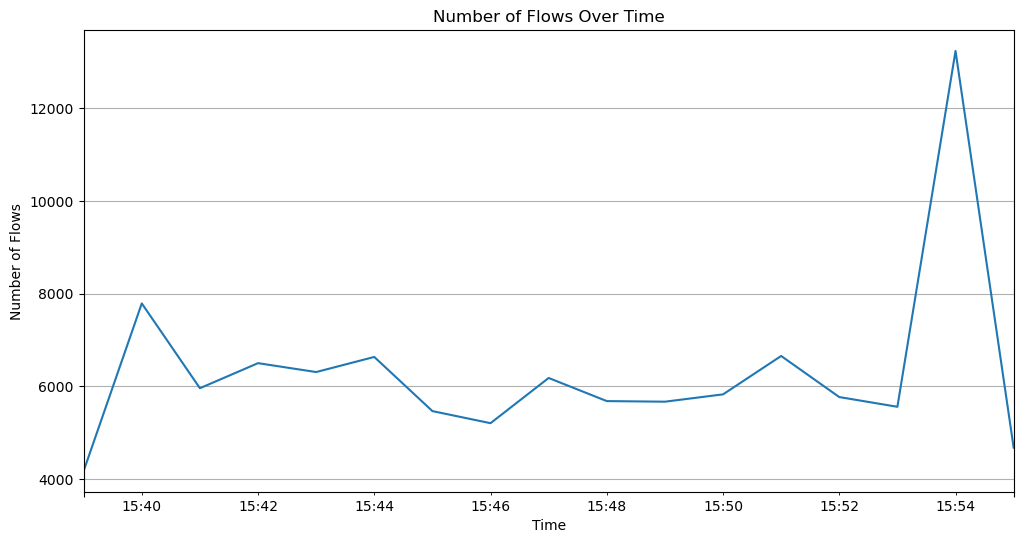

In [10]:
# Resample the data by time to count the number of flows per minute
flows_per_minute = df.resample('T', on='StartTime').size()

# Plot the number of flows over time
plt.figure(figsize=(12, 6))
flows_per_minute.plot()
plt.title('Number of Flows Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Flows')
plt.grid(True)
plt.show()

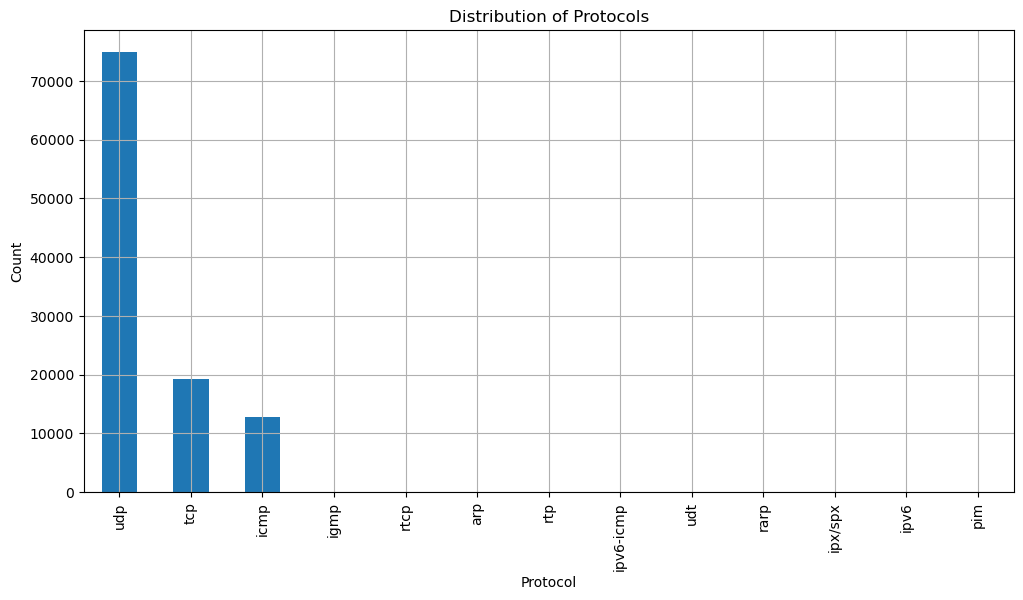

In [11]:
# Plot the distribution of protocols
protocol_counts = df['Proto'].value_counts()

plt.figure(figsize=(12, 6))
protocol_counts.plot(kind='bar')
plt.title('Distribution of Protocols')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.grid(True)
plt.show()

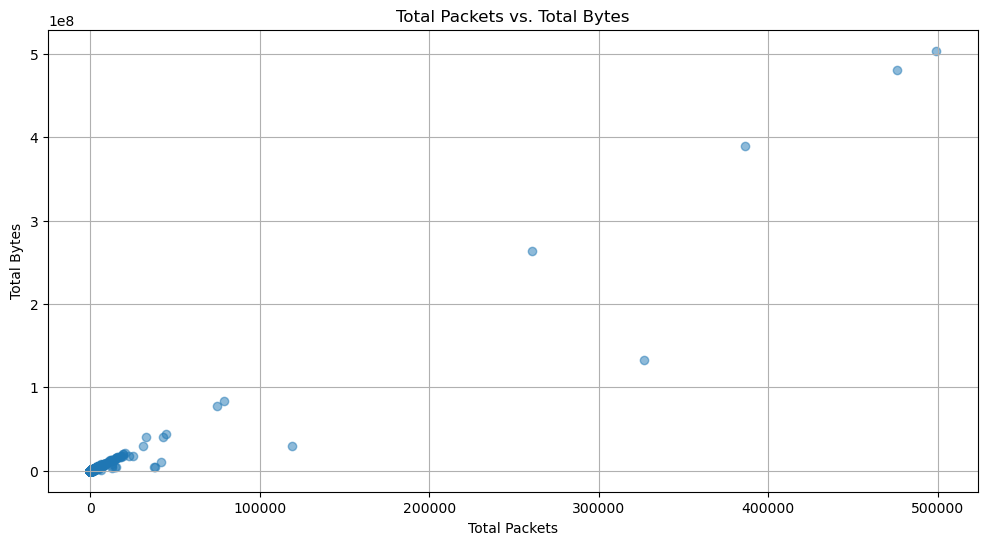

In [12]:
# Scatter plot of total packets vs. total bytes
plt.figure(figsize=(12, 6))
plt.scatter(df['TotPkts'], df['TotBytes'], alpha=0.5)
plt.title('Total Packets vs. Total Bytes')
plt.xlabel('Total Packets')
plt.ylabel('Total Bytes')
plt.grid(True)
plt.show()

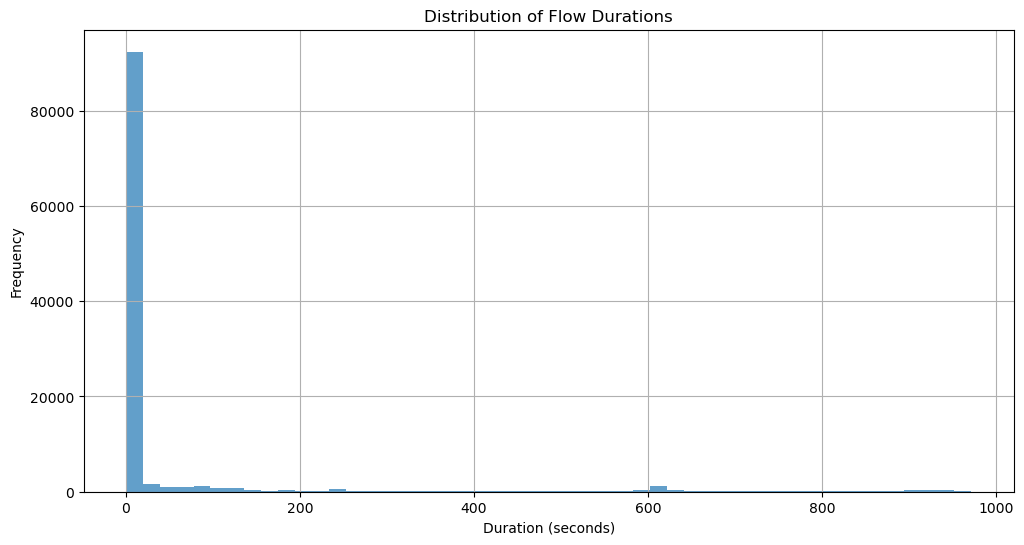

In [13]:
# Plot the distribution of flow durations
plt.figure(figsize=(12, 6))
df['Dur'].plot(kind='hist', bins=50, alpha=0.7)
plt.title('Distribution of Flow Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()